# cf-python exercise (3)

## Statisical collapses

Statisical collapses work on reducing the size of the axis to give an answer based on finding (for example) the minimum, mean, max or standard deviation.

In [1]:
# import the cf package
import cf

In [3]:
# Read the field from file ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc
f = cf.read('ncas/ncas_data/IPSL-CM5A-LR_r1i1p1_tas_n96_rcp45_mnth.nc')[0]
f

<CF Field: air_temperature(time(120), latitude(145), longitude(192)) K>

In [4]:
# Find the temporal variance at each XY location and plot the result
# (use the field's "collapse" method with the argument 'T: variance')
v = f.collapse('T: variance')
print(v)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K2
Cell methods    : time(1): mean (interval: 30 minutes) time(1): variance
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [5]:
%matplotlib inline

In [6]:
import cfplot as cfp

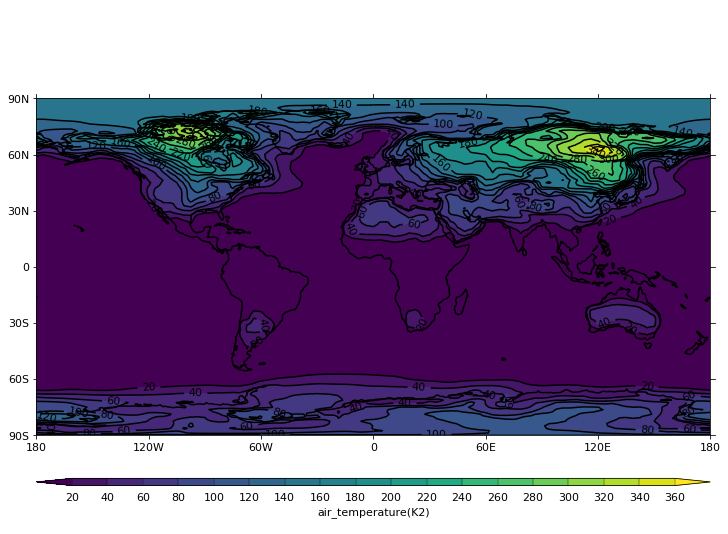

In [7]:
cfp.con(v)

In [8]:
# Find the time mean at each X-Y point
# (use the field's "collapse" method wit the argument 'T: mean')
t_mean = f.collapse('T: mean')
print(t_mean)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [9]:
# Calculate the global mean for each time and print the values for the first 12 times
# (use specify the operation as 'X: Y: mean', or equivalently 'area: mean')
x = f.collapse('X: Y: mean')
print(x.array[:12])

[[[275.14305112]]

 [[275.07955644]]

 [[275.08529227]]

 [[275.29717096]]

 [[276.82129897]]

 [[278.13823508]]

 [[279.43361836]]

 [[280.03470329]]

 [[279.58226719]]

 [[278.39334869]]

 [[276.5805792 ]]

 [[275.24783543]]]


In [10]:
# Calculate the weighted global mean for each time and print the valuesfor the first 12 times
# (use the "weights" parameter of the field's collapse method with the
# value ['X', 'Y'] or equivalently the value 'area')
x = f.collapse('area: mean', weights='area')
print(x.array[:12])

[[[283.8122294 ]]

 [[283.709302  ]]

 [[284.18888204]]

 [[284.96334437]]

 [[286.19907216]]

 [[286.96110774]]

 [[287.64243518]]

 [[288.18234269]]

 [[288.00099162]]

 [[287.25347405]]

 [[285.87638167]]

 [[284.57930887]]]


In [11]:
# For each time find the range spanned by the zonal weighted means 
# (use the argument "'X: mean Y: range'" and the parameter "weights='X'")
g = f.collapse('X: mean Y: range', weights='X')
print(g)
print(g.data)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(1), longitude(1)) K
Cell methods    : time(120): mean (interval: 30 minutes) longitude(1): mean latitude(1): range
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(1) = [0.0] degrees_north
                : longitude(1) = [179.0625] degrees_east
                : height(1) = [2.0] m
[[[53.71201165517169, ..., 65.12694808390887]]] K


In [12]:
# Find the weighted temporal minimum of the latitudinal maxima of the longitudinal means 
print(f)
g = f.collapse('X: mean Y: max T: minimum', weights=['X', 'Y', 'T'])
print(g.array)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[[297.71326639]]]


## Evaluate anomalies from the mean

In [13]:
# Find the time average at each X-Y location, weighted by month lengths
t_mean = f.collapse('T: mean', weights='T')
print(t_mean)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(1), latitude(145), longitude(192)) K
Cell methods    : time(1): mean (interval: 30 minutes)
Dimension coords: time(1) = [1964-12-01 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


In [14]:
# For each element of the original field, calculate the anomaly from the temporal mean
# and print its array of values 
# (use simple subtraction)
t_anom = f - t_mean
print(t_anom)
print(t_anom.array)

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(120), latitude(145), longitude(192)) K
Cell methods    : time(120): mean (interval: 30 minutes)
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m
[[[ 17.23374316  17.23374316  17.23374316 ...  17.23374316  17.23374316
    17.23374316]
  [ 15.1198893   15.11096985  15.10127152 ...  15.15195753  15.13956857
    15.13011486]
  [ 14.6592992   14.66458582  14.66969063 ...  14.62081899  14.61362175
    14.63668101]
  ...
  [ -8.06449489  -8.07036848  -8.07707876 ...  -8.03082001  -8.03393452
    -8.04885026]
  [ -7.99935323  -7.99810691  -7.99668703 ...  -7.99322772  -7.99598733
    -7.99775713]
  [ -8.4711552   -8.4711552   -8.4711552  ...  -8.4711552   -8.4711552
    -8.4711552

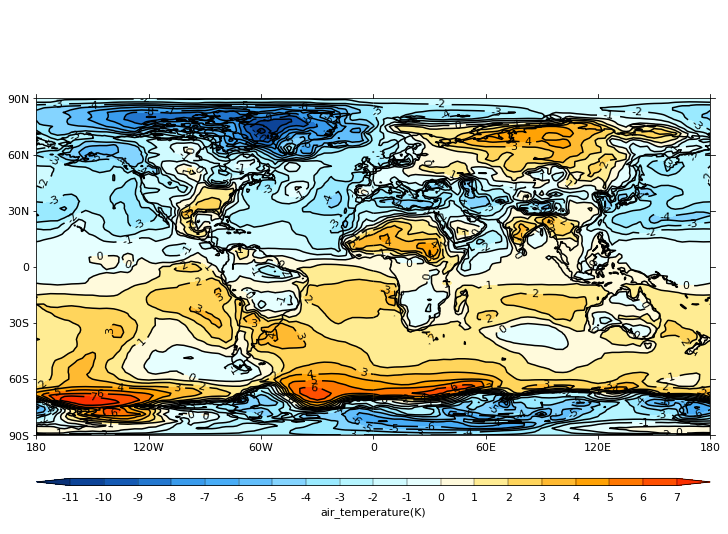

In [15]:
# Plot the anomaly from the mean for the month of April 1966
# (April 1966 may be specified as cf.month(4) & cf.year(1966))
cfp.con(t_anom.subspace(T=cf.month(4) & cf.year(1966)))

# Climatological time statistics

Field: air_temperature (ncvar%tas)
----------------------------------
Data            : air_temperature(time(4), latitude(145), longitude(192)) K
Cell methods    : time(4): mean (interval: 30 minutes) time(4): minimum within years time(4): mean over years
Dimension coords: time(4) = [1960-01-15 00:00:00, ..., 1960-10-16 12:00:00] 365_day
                : latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
                : height(1) = [2.0] m


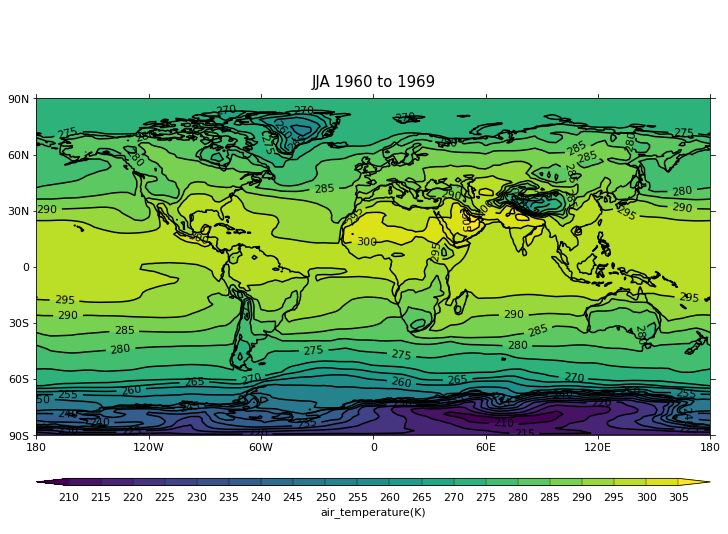

In [16]:
# Find the multiannual average of the seasonal (DJF, MAM, etc.) minima and plot the result for JJA 
# (use the special argument 'T: minimum within years T: mean over years' to the field's "collapse".
#  method. This also requires the "within_years" parameter to define over which periods to take
#  the minima within each year. Set this parameter to cf.seasons(), which will specify the
#  four seasons of DJF, MAM, JJA, SON)
g = f.collapse('T: minimum within years T: mean over years', within_years=cf.seasons())
print(g)
cfp.con(g.subspace(T=cf.month(cf.wi(6, 8))), title='JJA 1960 to 1969')

In [17]:
# Print the new field's time cordiante values and their bounds - note that the bounds span the full 10 years,
# but the coordinate values themselves lie in the correct season of the first year
print(g.coordinate('T').datetime_array)
print(g.coordinate('T').bounds.datetime_array)

[cftime.DatetimeNoLeap(1960, 1, 15, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1960, 4, 16, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1960, 7, 17, 0, 0, 0, 0)
 cftime.DatetimeNoLeap(1960, 10, 16, 12, 0, 0, 0)]
[[cftime.DatetimeNoLeap(1959, 12, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 3, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 3, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 6, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 6, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 9, 1, 0, 0, 0, 0)]
 [cftime.DatetimeNoLeap(1960, 9, 1, 0, 0, 0, 0)
  cftime.DatetimeNoLeap(1969, 12, 1, 0, 0, 0, 0)]]


## Cell methods: describing the variation of the quantity within cells

In [18]:
# Inspect the original and new fields' cell methods, that describe the variation of the
# quantity within cells, i.e. a record of the collapses that have been performed
# (use the cell_methods attribute of the field)
print(f.cell_methods)
print(g.cell_methods)

Constructs:
{'cellmethod0': <CF CellMethod: domainaxis0: mean (interval: 30 minutes)>}
Constructs:
{'cellmethod0': <CF CellMethod: domainaxis0: mean (interval: 30 minutes)>,
 'cellmethod1': <CF CellMethod: domainaxis0: minimum within years>,
 'cellmethod2': <CF CellMethod: domainaxis0: mean over years>}


## Cell areas and weights

Field: cell_area
----------------
Data            : cell_area(latitude(145), longitude(192)) m2
Dimension coords: latitude(145) = [-90.0, ..., 90.0] degrees_north
                : longitude(192) = [0.0, ..., 358.125] degrees_east
[[7.90324668e+07 7.90324668e+07 7.90324668e+07 ... 7.90324668e+07
  7.90324668e+07 7.90324668e+07]
 [6.32203311e+08 6.32203311e+08 6.32203311e+08 ... 6.32203311e+08
  6.32203311e+08 6.32203311e+08]
 [1.26410573e+09 1.26410573e+09 1.26410573e+09 ... 1.26410573e+09
  1.26410573e+09 1.26410573e+09]
 ...
 [1.26410573e+09 1.26410573e+09 1.26410573e+09 ... 1.26410573e+09
  1.26410573e+09 1.26410573e+09]
 [6.32203311e+08 6.32203311e+08 6.32203311e+08 ... 6.32203311e+08
  6.32203311e+08 6.32203311e+08]
 [7.90324668e+07 7.90324668e+07 7.90324668e+07 ... 7.90324668e+07
  7.90324668e+07 7.90324668e+07]]


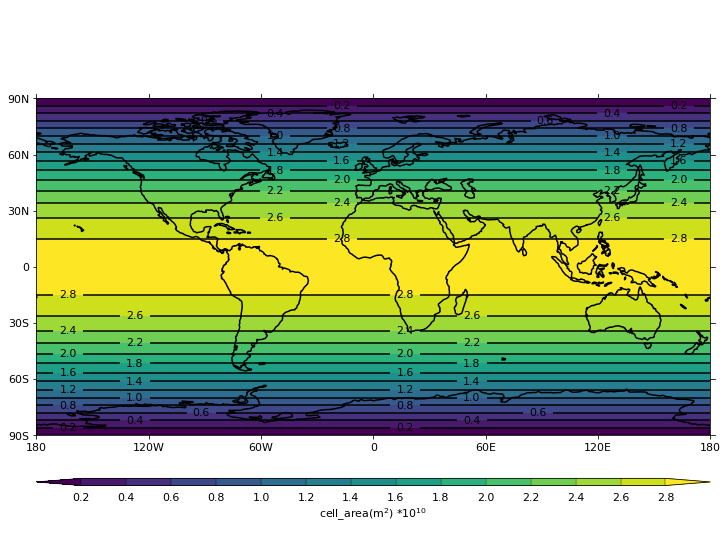

In [19]:
# Find and plot the horizontal cell areas of the field
# (use the field's "cell_area" method)
area = f.cell_area()
print(area)
print(area.array)
cfp.con(area)

In [21]:
# Find the weights used in time axis collapses
# (use the field's weights method and teh cfp.lineplot function on the result)
w = f.weights('T')


In [22]:
print(w)


Field: long_name=weights
------------------------
Data            : long_name=weights(time(120)) d
Dimension coords: time(120) = [1959-12-16 12:00:00, ..., 1969-11-16 00:00:00] 365_day


In [23]:
print(w.array)


[31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31.
 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.
 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31.
 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.
 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31.
 30. 31. 31. 30. 31. 30. 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.
 31. 31. 28. 31. 30. 31. 30. 31. 31. 30. 31. 30.]


In [27]:
import cfplot as cfp

In [33]:
f = cf.read('ncas/ncas_data/data1.nc')[1]

In [34]:
f = f.collapse('mean', 'longitude')

In [35]:
f.Units -= 273.15

# Reset the plotting limits

In [36]:
cfp.gset()

In [37]:
f.construct('latitude').array

array([ 89.14152   ,  88.02943   ,  86.910774  ,  85.79063   ,
        84.66992   ,  83.54895   ,  82.42782   ,  81.306595  ,
        80.18531   ,  79.06398   ,  77.94263   ,  76.82124   ,
        75.699844  ,  74.57843   ,  73.45701   ,  72.33558   ,
        71.214134  ,  70.09269   ,  68.97124   ,  67.849785  ,
        66.728325  ,  65.606865  ,  64.4854    ,  63.363934  ,
        62.242462  ,  61.12099   ,  59.99952   ,  58.878044  ,
        57.75657   ,  56.635094  ,  55.513615  ,  54.392136  ,
        53.270657  ,  52.149174  ,  51.027695  ,  49.90621   ,
        48.78473   ,  47.663246  ,  46.541763  ,  45.42028   ,
        44.298794  ,  43.17731   ,  42.055824  ,  40.934338  ,
        39.81285   ,  38.691364  ,  37.56988   ,  36.44839   ,
        35.326904  ,  34.205418  ,  33.08393   ,  31.962444  ,
        30.840956  ,  29.719467  ,  28.597979  ,  27.47649   ,
        26.355003  ,  25.233515  ,  24.112024  ,  22.990536  ,
        21.869047  ,  20.747559  ,  19.62607   ,  18.50

In [38]:
# Mark a lineplot near to the equator
g=f.subspace(latitude=0.56074494)

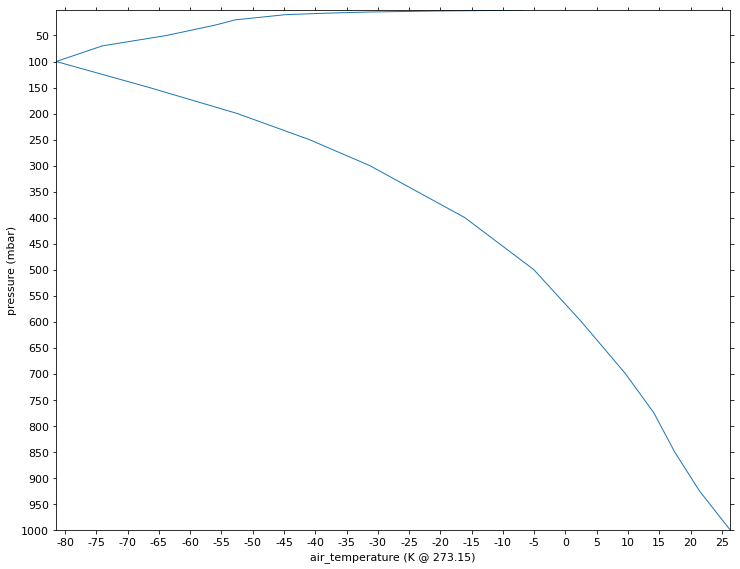

In [39]:
cfp.lineplot(g)